In [ ]:
# !pip install sqlalchemy==1.4.7
# !pip install ibm_db_sa
# !pip install ipython-sql

In [28]:
# found panadas_profiling in a Titanic machine learning article. Had to run in Python Data environment.
import pandas as pd
from pandas_profiling import ProfileReport
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [ ]:
# Load SQL using ipython-sql
# %load_ext sql

In [ ]:
# import os

In [2]:
host = "localhost"
database = "Titanic_Combined_sql"
user = "postgres"
password = "@Princess21"

In [ ]:
# connection_string = f"postgresql://{user}:{password}@{host}/{database}"

In [ ]:
# %sql $connection_string

In [ ]:
# %%sql 
# SELECT * from titanic_combined_sql LIMIT 10

In [3]:
# Import SQL into Jupyter - Module 8.5.1 code
db_string = f"postgresql://{user}:{password}@{host}/{database}"

In [4]:
engine = create_engine(db_string)

In [5]:
insp = inspect(engine)
insp.get_table_names()

['rms_titanic_passengers_and_crew',
 'rms_titanic_country_of_residency',
 'titanic',
 'titanic_survivors',
 'titanic_combined_sql',
 'filtered_data']

In [30]:
# Create a JOIN. Join 2 tables from SQL
titanic_combined = ('SELECT * FROM RMS_titanic_passengers_and_crew AS p\
                        LEFT JOIN RMS_Titanic_country_of_residency AS r\
                            ON p.index = r.mainID\
                        LEFT JOIN Titanic AS t\
                            ON p.index = t.main_key\
                        LEFT JOIN Titanic_Survivors AS s\
                            ON p.index = s.index')
result_set = engine.execute(titanic_combined)
result_set = pd.DataFrame(result_set)
result_set.head()

0                  1       2       3     4     5       6        7   \
0  435  Browne Francis M.  1880.0  1960.0  32.0  80.0    Male   Single   
1  454      Nichols Emily  1863.0     NaN  48.0   NaN  Female  Widowed   
2  459         Odell Lily  1871.0  1966.0  40.0  95.0  Female  Married   
3  465          Brewer B.  1888.0     NaN  24.0   NaN    Male     None   
4  466        Coffey John  1889.0  1957.0  23.0  68.0    Male  Married   

          8          9   ...    41    42    43  44    45    46    47    48  \
0  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
1  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
2  Passenger  1st Class  ...  None  None  None NaN  None  None  None  None   
3       Crew     Engine  ...  None  None  None NaN  None  None  None  None   
4       Crew     Engine  ...  None  None  None NaN  None  None  None  None   

     49  50  
0  None NaN  
1  None NaN  
2  None NaN  
3  None NaN  
4  None NaN  

[5 rows x 51 columns]

In [7]:
# Import the data from SQL
df_titanic = pd.read_sql('SELECT * FROM titanic_combined_sql', engine)
df_titanic.head()

index                  passenger_name    born    died   age  age_at_death  \
0  1000                   Cohen Gurshon  1892.0  1978.0  19.0          85.0   
1  1005                   Colgan Joseph  1879.0     NaN  33.0           NaN   
2  1007  Collett Sidney Clarence Stuart  1887.0  1941.0  25.0          53.0   
3  1009                    Collins John  1874.0  1950.0  38.0          76.0   
4  1010                    Collins John  1894.0  1941.0  17.0          46.0   

  gender marital_status   category ticket_class  ...                   job  \
0   Male         Single  Passenger    3rd Class  ...  Printer / Compositor   
1   Male           None       Crew  Victualling  ...              Scullion   
2   Male         Single  Passenger    2nd Class  ...                  None   
3   Male        Married       Crew       Engine  ...               Fireman   
4   Male         Single       Crew  Victualling  ...                  None   

  pclass survived sibsp parch fare  boat  body country_id2  survived_y_n  
0   None      NaN   NaN   NaN  NaN  None  None         359           1.0  
1   None      NaN   NaN   NaN  NaN  None  None         363           1.0  
2   None      NaN   NaN   NaN  NaN  None  None         364           1.0  
3   None      NaN   NaN   NaN  NaN  None  None         365           1.0  
4   None      NaN   NaN   NaN  NaN  None  None        None           1.0  

[5 rows x 27 columns]

In [8]:
# describe the data set
df_titanic.describe()

born         died          age  age_at_death    survived  \
count  2885.000000  2453.000000  2885.000000   2454.000000  639.000000   
mean   1880.548700  1927.196494    30.963258     46.090465    0.483568   
std      12.018167    22.436764    12.029410     23.531453    0.500121   
min    1837.000000  1912.000000     0.000000      0.000000    0.000000   
25%    1873.000000  1912.000000    23.000000     26.250000    0.000000   
50%    1882.000000  1912.000000    29.000000     39.000000    0.000000   
75%    1889.000000  1943.000000    38.000000     67.000000    1.000000   
max    1912.000000  2009.000000    74.000000    104.000000    1.000000   

            sibsp       parch        fare  survived_y_n  
count  639.000000  639.000000  639.000000   2911.000000  
mean     0.593114    0.525822   43.549655      0.244589  
std      0.930340    0.917715   58.804085      0.429917  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000    0.000000   10.170850      0.000000  
50%      0.000000    0.000000   26.000000      0.000000  
75%      1.000000    1.000000   52.000000      0.000000  
max      5.000000    6.000000  512.329200      1.000000

In [9]:
# Learned and read from internet reading up on the Kaggle titanic project about Exploratory Data Analysis https://www.activestate.com/blog/how-to-use-machine-learning-to-determine-titanic-survivors/. 
# This is using the panadas_profiling library.
eda_report = ProfileReport(df_titanic)
eda_report

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Initial imports. This code is directly from Module 17.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Exploring Dataset

In [38]:
# get dtypes
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911 entries, 0 to 2910
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   df_index              2911 non-null   object 
 1   passenger_name        2911 non-null   object 
 2   born                  2885 non-null   float64
 3   died                  2453 non-null   float64
 4   age                   2885 non-null   float64
 5   age_at_death          2454 non-null   float64
 6   gender                2911 non-null   object 
 7   marital_status        1981 non-null   object 
 8   category              2911 non-null   object 
 9   ticket_class          2553 non-null   object 
 10  job_group             578 non-null    object 
 11  ticket                1347 non-null   object 
 12  cabin                 309 non-null    object 
 13  embarked              2477 non-null   object 
 14  disembarked           981 non-null    object 
 15  country_of_residence 

In [12]:
df_titanic[['gender', 'survived']].groupby(['gender'], as_index=False).mean()

gender  survived
0   Female  0.799228
1     Male  0.268421
2  Unknown       NaN

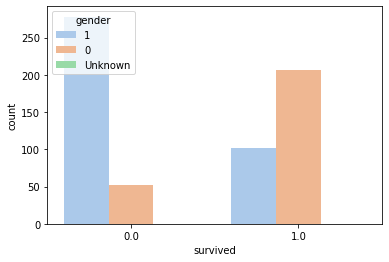

In [45]:
# number of survivors based on gender
sns.countplot(x="survived", hue = "gender", palette="pastel", data = df_titanic)
plt.show()

Text(0, 0.5, '% Survived')

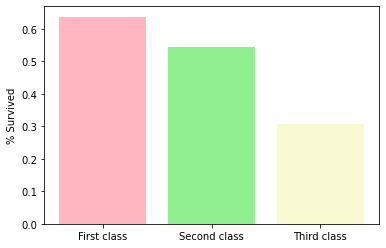

In [73]:
# trying plt.subplot found in Titanc documentation and verified on matplotlib - the base structure that is
# percentage survived by ticket class
fig, ax = plt.subplots()
pclass_count = df_titanic['pclass'].value_counts(sort=False)
survive_count = df_titanic.loc[df_titanic['survived'] == 1, ['pclass']].value_counts(sort=False)
ax.bar('First class', survive_count.iloc[0]/pclass_count.iloc[0], color='lightpink')
ax.bar('Second class', survive_count.iloc[1]/pclass_count.iloc[1], color='lightgreen')
ax.bar('Third class', survive_count.iloc[2]/pclass_count.iloc[2], color='lightgoldenrodyellow')
ax.set_ylabel('% Survived')

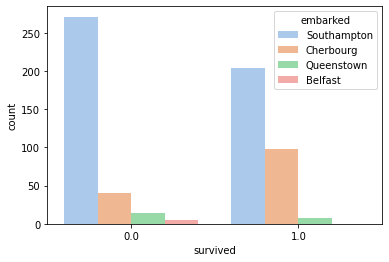

In [52]:
# number of survivors by where embarked(got on the boat)
sns.countplot(x="survived", hue = "embarked", palette="pastel", data = df_titanic)
plt.show()

In [96]:
# Age and Sex. used code from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# because it is cool
# survived = 'survived'
#not_survived = 'not survived'
#fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
#women = df_titanic[df_titanic['gender']=='0']
# men = df_titanic[df_titanic['gender']=='1']
#ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
#ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
# ax.legend()
# ax.set_titles('Female')
#ax = sns.displot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
#ax = sns.displot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
#ax.legend()
#_ = ax.set_title('Male')

In [ ]:
# directly from https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot. It's super cool
# t = sns.catplot(x="who", y="survived", col="class",
#                data=titanic, saturation=.5,
#                kind="bar", ci=None, aspect=.6)
#(t.set_axis_labels("", "Survival Rate")
#  .set_xticklabels(["Men", "Women", "Children"])
#  .set_titles("{col_name} {col_var}")
#  .set(ylim=(0, 1))
#  .despine(left=True))  ")

### Modeling

In [ ]:
# Drop "passenger_name"
train_encoded = titanic_encoded.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [ ]:
# Encode the dataset - From Module 17
titanic_encoded = pd.get_dummies(df_titanic, columns=["Sex", "Embarked"])
titanic_encoded.head()

In [ ]:
# count the empty values
titanic_encoded.isna().sum()

In [ ]:
# Remove rows missing values
titanic_encoded = titanic_encoded.dropna(subset = ['Age'])

In [ ]:
titanic_encoded.dtypes

In [ ]:
# Define the features set. From Module 17.8
X = titanic_encoded.copy()
X = X.drop("Survived", axis=1)
X.head()

In [ ]:
# Define the target set. From Module 17.8.
y = titanic_encoded["Survived"].ravel()
y[:5]

In [ ]:
# Splitting into Train and Test sets. From Module 17.8.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Creating a StandardScaler instance. From Module 17.8.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier. From Module 17.8.
rf_model = RandomForestClassifier(n_estimators=10, random_state=0) 

In [ ]:
# Fitting the model. From Module 17.8.
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data. From Module 17.8.
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix. From Module 17.8.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

In [ ]:
# Calculating the accuracy score. From Module 17.8.
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results. From Module 17.8.
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
# Calculate feature importance in the Random Forest model. From Module 17.8.
importances = rf_model.feature_importances_
importances

In [ ]:
# We can sort the features by their importance. From Module 17.8.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

In [ ]:
importances.plot.bar()